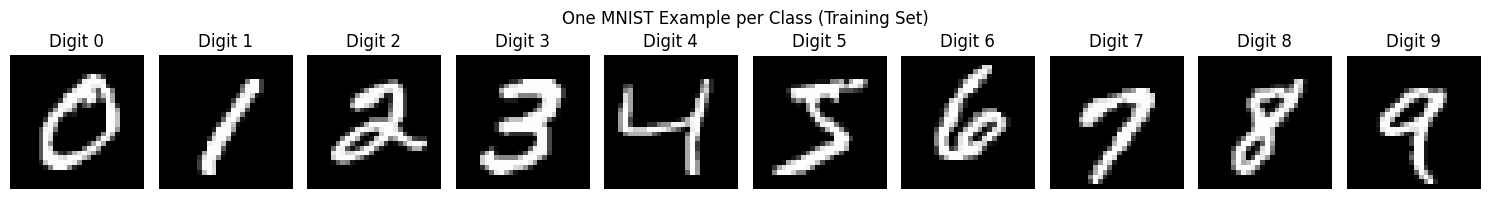

In [4]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 2. Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3. Find one example per digit (0–9)
examples_per_class = {}
for img, label in zip(x_train, y_train):
    if label not in examples_per_class:
        examples_per_class[label] = img
    if len(examples_per_class) == 10:
        break

# 4. Plot them
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2))
for digit in range(10):
    ax = axes[digit]
    ax.imshow(examples_per_class[digit], cmap='gray')
    ax.set_title(f'Digit {digit}')
    ax.axis('off')

plt.suptitle('One MNIST Example per Class (Training Set)')
plt.tight_layout()
plt.show()


In [9]:
# 1. Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# 2. Define the CNN model
model = Sequential([
    # First convolutional layer
    Conv2D(
        filters=6,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    ),

    # First average‐pooling
    AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),

    # Second convolutional layer
    Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu'
    ),

    # Second average‐pooling
    AveragePooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),

    # Flatten before the fully connected layers
    Flatten(),

    # Fully connected layer with 120 units
    Dense(
        units=120,
        activation='relu'
    ),

    # Fully connected layer with 84 units
    Dense(
        units=84,
        activation='relu'
    ),

    # Final fully connected layer with 10 outputs
    Dense(
        units=10,
        activation='softmax'
    )
])

# Print a model summary to verify the architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 13, 13, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
  Step 100/938 – Loss: 2.2759, Acc: 0.1250, Mean |grad|: 0.070359
  Step 200/938 – Loss: 2.1918, Acc: 0.3125, Mean |grad|: 0.080230
  Step 300/938 – Loss: 1.9671, Acc: 0.3750, Mean |grad|: 0.106958
  Step 400/938 – Loss: 1.0297, Acc: 0.8281, Mean |grad|: 0.144836
  Step 500/938 – Loss: 0.6232, Acc: 0.8594, Mean |grad|: 0.093201
  Step 600/938 – Loss: 0.5131, Acc: 0.8750, Mean |grad|: 0.078001
  Step 700/938 – Loss: 0.2764, Acc: 0.9688, Mean |grad|: 0.074612
  Step 800/938 – Loss: 0.2213, Acc: 0.9219, Mean |grad|: 0.078400
  Step 900/938 – Loss: 0.2996, Acc: 0.9062, Mean |grad|: 0.105739
  Step 938/938 – Loss: 0.4814, Acc: 0.8750, Mean |grad|: 0.202716
Epoch 2/10
  Step 100/938 – Loss: 0.2700, Acc: 0.9219, Mean |grad|: 0.096652
  Step 200/938 – Loss: 0.4134, Acc: 0.8906, Mean |grad|: 0.144951
  Step 300/938 – Loss: 0.2592, Acc: 0.9219, Mean |grad|: 0.063398
  Step 400/938 – Loss: 0.3653, Acc: 0.8906, Mean |grad|: 0.100198
  Step 500/938 – Loss: 0.5070, Acc: 0.8594, Mean |grad

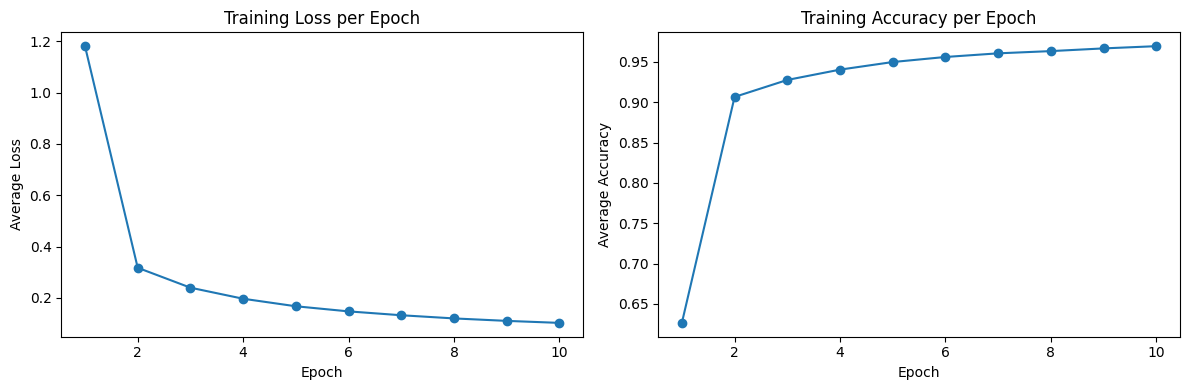

In [6]:
#  Import libraries
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the mini‐batch creation function
def create_mini_batches(X, y, batch_size=64, shuffle=True):
    """
    Split (X, y) into non‐overlapping mini‐batches of size `batch_size`,
    reshape each X_batch to (batch_size, 28, 28, 1), normalize to [0,1], and one-hot encode y_batch.
    Returns a list of (X_batch, y_batch) tuples.
    """
    m = X.shape[0]
    if shuffle:
        perm = np.random.permutation(m)
        X, y = X[perm], y[perm]

    mini_batches = []
    for start in range(0, m, batch_size):
        end = start + batch_size
        X_batch = X[start:end]
        y_batch = y[start:end]

        # Reshape + normalize for CNN input
        X_batch = X_batch[..., np.newaxis].astype('float32') / 255.0

        # One-hot encode labels
        y_batch = to_categorical(y_batch, num_classes=10)

        mini_batches.append((X_batch, y_batch))

    return mini_batches


#  Set up loss function and hyperparameters
loss_fn = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.01
num_epochs = 10

# Prepare lists for plotting per epoch
epoch_losses = []
epoch_accuracies = []

#  Training loop over epochs
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    # Re-create and shuffle mini‐batches at the start of each epoch
    mini_batches = create_mini_batches(x_train, y_train, batch_size=64, shuffle=True)

    # Initialize accumulators for this epoch
    sum_loss = 0.0
    sum_acc = 0.0
    num_batches = len(mini_batches)

    for t, (X_batch, y_batch) in enumerate(mini_batches):
        # (a) Compute loss and gradients for this mini‐batch
        with tf.GradientTape() as tape:
            logits = model(X_batch, training=True)                       # forward pass
            loss_value = loss_fn(y_batch, logits)                        # compute loss

        gradients = tape.gradient(loss_value, model.trainable_variables)  # ∇̂_W F

        # (b) Update each parameter W using SGD
        for var, grad in zip(model.trainable_variables, gradients):
            var.assign_sub(learning_rate * grad)

        # Compute training accuracy on this mini-batch
        preds = tf.argmax(logits, axis=1)
        labels = tf.argmax(y_batch, axis=1)
        batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

        # Accumulate for epoch averages
        sum_loss += loss_value.numpy()
        sum_acc += batch_accuracy.numpy()

        #  Monitor every 100 steps
        if (t + 1) % 100 == 0 or (t + 1) == num_batches:
            grad_norm = tf.add_n([tf.reduce_mean(tf.abs(g)) for g in gradients])
            print(
                f"  Step {t+1:03d}/{num_batches} – "
                f"Loss: {loss_value.numpy():.4f}, "
                f"Acc: {batch_accuracy.numpy():.4f}, "
                f"Mean |grad|: {grad_norm.numpy():.6f}"
            )

    # Compute and store average loss & accuracy for this epoch
    epoch_losses.append(sum_loss / num_batches)
    epoch_accuracies.append(sum_acc / num_batches)

#  After training plot loss and accuracy per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()


Epoch 1/10
  Step 100/938 – Loss: 2.2747, Acc: 0.3281, Mean |grad|: 0.076087
  Step 200/938 – Loss: 2.2482, Acc: 0.3438, Mean |grad|: 0.129467
  Step 300/938 – Loss: 2.1957, Acc: 0.2969, Mean |grad|: 0.097622
  Step 400/938 – Loss: 1.8895, Acc: 0.6406, Mean |grad|: 0.139541
  Step 500/938 – Loss: 0.9943, Acc: 0.7969, Mean |grad|: 0.144225
  Step 600/938 – Loss: 0.6261, Acc: 0.7812, Mean |grad|: 0.137565
  Step 700/938 – Loss: 0.4972, Acc: 0.8125, Mean |grad|: 0.140002
  Step 800/938 – Loss: 0.4377, Acc: 0.8438, Mean |grad|: 0.213145
  Step 900/938 – Loss: 0.3331, Acc: 0.9219, Mean |grad|: 0.141189
  Step 938/938 – Loss: 0.2079, Acc: 0.9688, Mean |grad|: 0.091366
  --> Test Loss: 0.3631, Test Accuracy: 0.8961
Epoch 2/10
  Step 100/938 – Loss: 0.4945, Acc: 0.8281, Mean |grad|: 0.159996
  Step 200/938 – Loss: 0.2866, Acc: 0.9531, Mean |grad|: 0.127767
  Step 300/938 – Loss: 0.2607, Acc: 0.9219, Mean |grad|: 0.066784
  Step 400/938 – Loss: 0.2400, Acc: 0.9219, Mean |grad|: 0.099335
  Step 

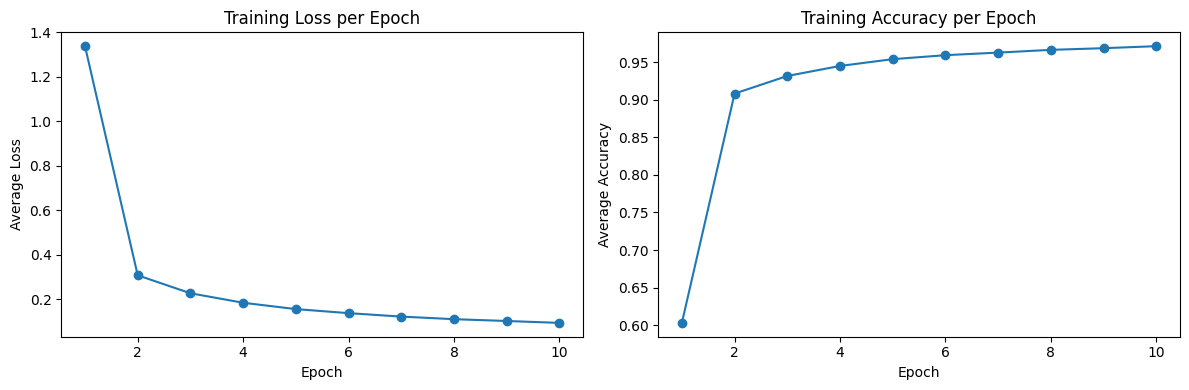

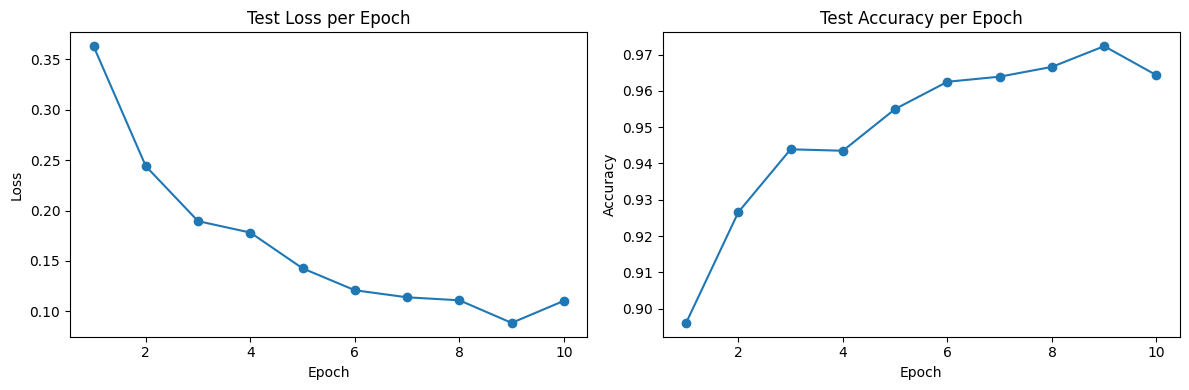

In [3]:
#  Import libraries
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

#  Define the mini‐batch creation function
def create_mini_batches(X, y, batch_size=64, shuffle=True):
    """
    Split (X, y) into non‐overlapping mini‐batches of size `batch_size`,
    reshape each X_batch to (batch_size, 28, 28, 1), normalize to [0,1], and one-hot encode y_batch.
    Returns a list of (X_batch, y_batch) tuples.
    """
    m = X.shape[0]
    if shuffle:
        perm = np.random.permutation(m)
        X, y = X[perm], y[perm]

    mini_batches = []
    for start in range(0, m, batch_size):
        end = start + batch_size
        X_batch = X[start:end]
        y_batch = y[start:end]

        # Reshape + normalize for CNN input
        X_batch = X_batch[..., np.newaxis].astype('float32') / 255.0

        # One-hot encode labels
        y_batch = to_categorical(y_batch, num_classes=10)

        mini_batches.append((X_batch, y_batch))

    return mini_batches


#  Set up loss function and hyperparameters
loss_fn = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.01
num_epochs = 10

#  Prepare lists for plotting per epoch
epoch_losses = []
epoch_accuracies = []

#  Prepare lists for test metrics and preprocess test set
epoch_test_losses = []
epoch_test_accuracies = []
X_test_proc = x_test[..., np.newaxis].astype('float32') / 255.0
y_test_proc = to_categorical(y_test, num_classes=10)

# Training loop over epochs
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    # Re-create and shuffle mini‐batches at the start of each epoch
    mini_batches = create_mini_batches(x_train, y_train, batch_size=64, shuffle=True)

    # Initialize accumulators for this epoch
    sum_loss = 0.0
    sum_acc = 0.0
    num_batches = len(mini_batches)

    for t, (X_batch, y_batch) in enumerate(mini_batches):
        # (a) Compute loss and gradients for this mini‐batch
        with tf.GradientTape() as tape:
            logits = model(X_batch, training=True)                       # forward pass
            loss_value = loss_fn(y_batch, logits)                        # compute loss

        gradients = tape.gradient(loss_value, model.trainable_variables)  # ∇̂_W F

        # (b) Update each parameter W using SGD
        for var, grad in zip(model.trainable_variables, gradients):
            var.assign_sub(learning_rate * grad)

        # Compute training accuracy on this mini-batch
        preds = tf.argmax(logits, axis=1)
        labels = tf.argmax(y_batch, axis=1)
        batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

        # Accumulate for epoch averages
        sum_loss += loss_value.numpy()
        sum_acc += batch_accuracy.numpy()

        # Monitor every 100 steps
        if (t + 1) % 100 == 0 or (t + 1) == num_batches:
            grad_norm = tf.add_n([tf.reduce_mean(tf.abs(g)) for g in gradients])
            print(
                f"  Step {t+1:03d}/{num_batches} – "
                f"Loss: {loss_value.numpy():.4f}, "
                f"Acc: {batch_accuracy.numpy():.4f}, "
                f"Mean |grad|: {grad_norm.numpy():.6f}"
            )

    # Compute and store average loss & accuracy for this epoch
    epoch_losses.append(sum_loss / num_batches)
    epoch_accuracies.append(sum_acc / num_batches)

    # Compute test loss and accuracy at the end of this epoch
    test_logits = model(X_test_proc, training=False)
    test_loss = loss_fn(y_test_proc, test_logits).numpy()
    test_preds = tf.argmax(test_logits, axis=1)
    test_labels = tf.argmax(y_test_proc, axis=1)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, test_labels), tf.float32)).numpy()

    epoch_test_losses.append(test_loss)
    epoch_test_accuracies.append(test_accuracy)

    print(f"  --> Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#  Plot loss and accuracy per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

#  Plot test loss and accuracy per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_test_losses, marker='o')
plt.title('Test Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_test_accuracies, marker='o')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Epoch 1/10
  Step 100/938 – Loss: 2.2796, Acc: 0.3281, Mean |grad|: 0.074853
  Step 200/938 – Loss: 2.2567, Acc: 0.3281, Mean |grad|: 0.074591
  Step 300/938 – Loss: 2.2092, Acc: 0.4531, Mean |grad|: 0.073165
  Step 400/938 – Loss: 2.1012, Acc: 0.4219, Mean |grad|: 0.097582
  Step 500/938 – Loss: 1.3684, Acc: 0.5781, Mean |grad|: 0.164706
  Step 600/938 – Loss: 0.8935, Acc: 0.7031, Mean |grad|: 0.250130
  Step 700/938 – Loss: 0.4884, Acc: 0.8594, Mean |grad|: 0.125360
  Step 800/938 – Loss: 0.4556, Acc: 0.9062, Mean |grad|: 0.108037
  Step 900/938 – Loss: 0.5354, Acc: 0.8438, Mean |grad|: 0.096533
  Step 938/938 – Loss: 0.5905, Acc: 0.8750, Mean |grad|: 0.143367
  --> Test Loss: 0.4199, Test Accuracy: 0.8708
Epoch 2/10
  Step 100/938 – Loss: 0.4785, Acc: 0.8750, Mean |grad|: 0.149535
  Step 200/938 – Loss: 0.4399, Acc: 0.8594, Mean |grad|: 0.168467
  Step 300/938 – Loss: 0.2780, Acc: 0.9062, Mean |grad|: 0.130613
  Step 400/938 – Loss: 0.5027, Acc: 0.8438, Mean |grad|: 0.122073
  Step 

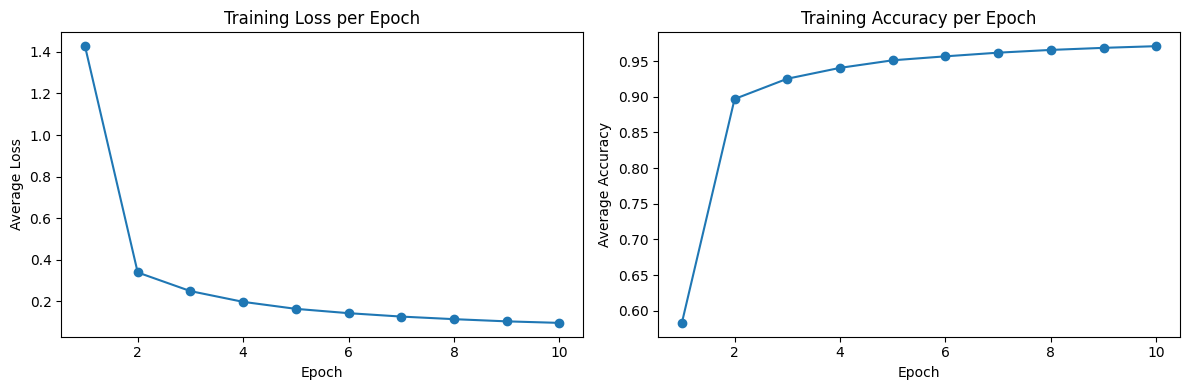

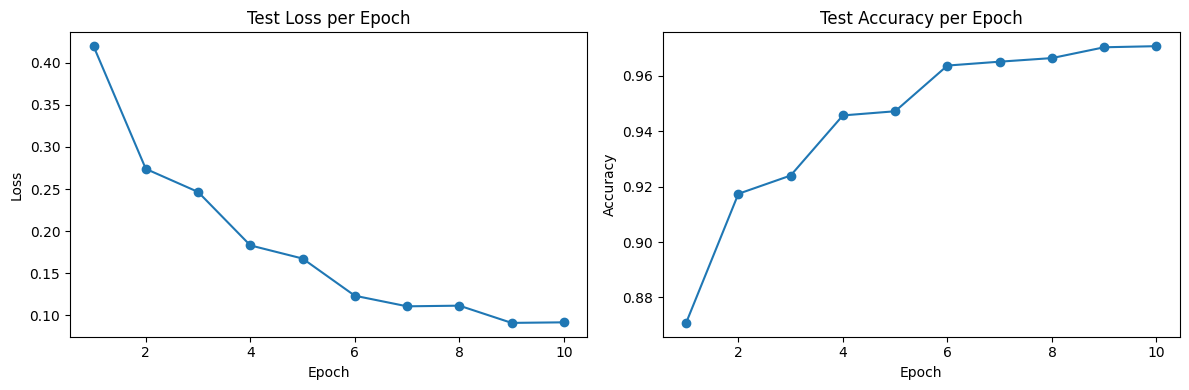

Confusion Matrix:
[[ 969    0    1    0    0    1    6    2    1    0]
 [   0 1125    3    0    0    0    2    1    4    0]
 [   7    1 1005    2    2    0    3    7    5    0]
 [   0    2    4  942    2   29    0    8   11   12]
 [   0    0    2    0  943    0    5    3    2   27]
 [   3    0    0    2    1  866    6    2    8    4]
 [   7    3    1    0    5    4  934    0    4    0]
 [   0    6   10    1    1    0    0  999    2    9]
 [   7    1    3    0    2    2    4    4  947    4]
 [   4    7    0    4    8    1    0    7    1  977]]


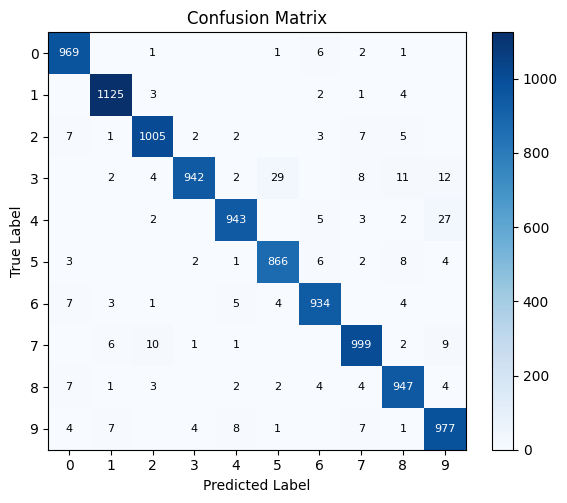

In [10]:
# Import libraries
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the mini‐batch creation function
def create_mini_batches(X, y, batch_size=64, shuffle=True):
    """
    Split (X, y) into non‐overlapping mini‐batches of size `batch_size`,
    reshape each X_batch to (batch_size, 28, 28, 1), normalize to [0,1], and one-hot encode y_batch.
    Returns a list of (X_batch, y_batch) tuples.
    """
    m = X.shape[0]
    if shuffle:
        perm = np.random.permutation(m)
        X, y = X[perm], y[perm]

    mini_batches = []
    for start in range(0, m, batch_size):
        end = start + batch_size
        X_batch = X[start:end]
        y_batch = y[start:end]

        # Reshape + normalize for CNN input
        X_batch = X_batch[..., np.newaxis].astype('float32') / 255.0

        # One-hot encode labels
        y_batch = to_categorical(y_batch, num_classes=10)

        mini_batches.append((X_batch, y_batch))

    return mini_batches

#  Set up loss function and hyperparameters
loss_fn = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.01
num_epochs = 10

#  Prepare lists for plotting per epoch
epoch_losses = []
epoch_accuracies = []

#  Prepare lists for test metrics and preprocess test set
epoch_test_losses = []
epoch_test_accuracies = []
X_test_proc = x_test[..., np.newaxis].astype('float32') / 255.0
y_test_proc = to_categorical(y_test, num_classes=10)

#  Training loop over epochs
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    # Re-create and shuffle mini‐batches at the start of each epoch
    mini_batches = create_mini_batches(x_train, y_train, batch_size=64, shuffle=True)

    # Initialize accumulators for this epoch
    sum_loss = 0.0
    sum_acc = 0.0
    num_batches = len(mini_batches)

    for t, (X_batch, y_batch) in enumerate(mini_batches):
        # (a) Compute loss and gradients for this mini‐batch
        with tf.GradientTape() as tape:
            logits = model(X_batch, training=True)                       # forward pass
            loss_value = loss_fn(y_batch, logits)                        # compute loss

        gradients = tape.gradient(loss_value, model.trainable_variables)  # ∇̂_W F

        # (b) Update each parameter W using SGD
        for var, grad in zip(model.trainable_variables, gradients):
            var.assign_sub(learning_rate * grad)

        # Compute training accuracy on this mini-batch
        preds = tf.argmax(logits, axis=1)
        labels = tf.argmax(y_batch, axis=1)
        batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

        # Accumulate for epoch averages
        sum_loss += loss_value.numpy()
        sum_acc += batch_accuracy.numpy()

        # Monitor every 100 steps
        if (t + 1) % 100 == 0 or (t + 1) == num_batches:
            grad_norm = tf.add_n([tf.reduce_mean(tf.abs(g)) for g in gradients])
            print(
                f"  Step {t+1:03d}/{num_batches} – "
                f"Loss: {loss_value.numpy():.4f}, "
                f"Acc: {batch_accuracy.numpy():.4f}, "
                f"Mean |grad|: {grad_norm.numpy():.6f}"
            )

    # Compute and store average loss & accuracy for this epoch
    epoch_losses.append(sum_loss / num_batches)
    epoch_accuracies.append(sum_acc / num_batches)

    # 6b. Compute test loss and accuracy at the end of this epoch
    test_logits = model(X_test_proc, training=False)
    test_loss = loss_fn(y_test_proc, test_logits).numpy()
    test_preds = tf.argmax(test_logits, axis=1)
    test_labels = tf.argmax(y_test_proc, axis=1)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, test_labels), tf.float32)).numpy()

    epoch_test_losses.append(test_loss)
    epoch_test_accuracies.append(test_accuracy)

    print(f"  --> Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#  Plot loss and accuracy per epoch (training)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

#  Plot test loss and accuracy per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_test_losses, marker='o')
plt.title('Test Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_test_accuracies, marker='o')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

#  Compute and display the confusion matrix
def compute_confusion_matrix(y_true, y_pred, num_classes=10):
    """
    Compute a confusion matrix given true labels and predicted labels.
    Args:
        y_true      : 1D array of shape (n_samples,) with integer class labels in [0, num_classes-1]
        y_pred      : 1D array of shape (n_samples,) with integer class labels in [0, num_classes-1]
        num_classes : total number of classes (default: 10 for MNIST)
    Returns:
        cm : 2D numpy array of shape (num_classes, num_classes), where
             cm[i, j] is the count of samples whose true label = i and predicted label = j.
    """
    cm_tf = tf.math.confusion_matrix(y_true, y_pred, num_classes=num_classes)
    return cm_tf.numpy()

# Recompute final test predictions explicitly
test_logits_final = model(X_test_proc, training=False)
test_preds_final = tf.argmax(test_logits_final, axis=1).numpy()
test_labels_final = tf.argmax(y_test_proc, axis=1).numpy()

conf_matrix = compute_confusion_matrix(test_labels_final, test_preds_final, num_classes=10)

print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# Annotate each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        count = conf_matrix[i, j]
        if count > 0:
            plt.text(j, i, str(count),
                     ha='center', va='center',
                     color='white' if count > conf_matrix.max() * 0.5 else 'black',
                     fontsize=8)

plt.tight_layout()
plt.show()
